# Images

This notebook will cover how images are represented as tensors. It will also go over basic image transformations.

In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Image representation

Computers see images as tensors (height $\times$ width $\times$ channels) where a single value is the intensity of the channel of the pixel, usually in range $[0, 255]$

Example: RGB (red, green, blue color channels)

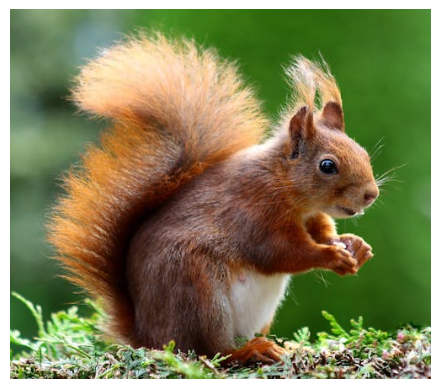

In [3]:
img = cv2.imread("./data/squirrel.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # cv2 uses BGR by default. Convert to RGB for matplotlib

plt.imshow(img)
plt.axis('off')
plt.show()

In [15]:
print(img.shape) # (height, width, channels)

(439, 500, 3)


For example, the RGB intensities of the top left pixel is:

In [17]:
print(img[0, 0])

[ 97 128  86]


### Grayscale images

Many tasks (edges, shape detection) care more about intensity changes than color. Because of this we can use only one channel to simplify the problem and reduce computation costs.

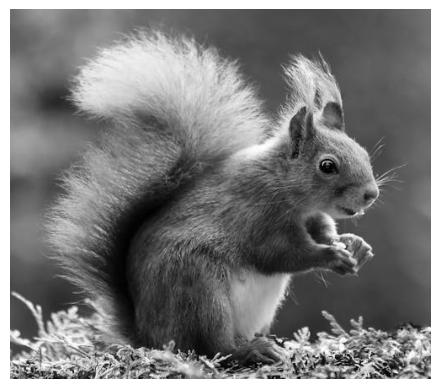

(439, 500)
114


In [22]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

print(gray.shape)  # (height, width)
print(gray[0, 0])  # single intensity of top-left pixel

### Color spaces (HSV)

HSV is a color representation that re-expresses RGB in terms of perceptually meaningful channels:

Hue encodes the dominant wavelength (what color it is), Saturation how pure versus gray the color is, and Value how bright it is, separating color identity from illumination.

In [ ]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
print(hsv.shape)  # (height, width, channels)
print(hsv[0][0])  # HSV values of top-left pixel

(439, 500, 3)
[ 52  84 128]


This is more intuitive for humans + you can do simple image segmenation with it:

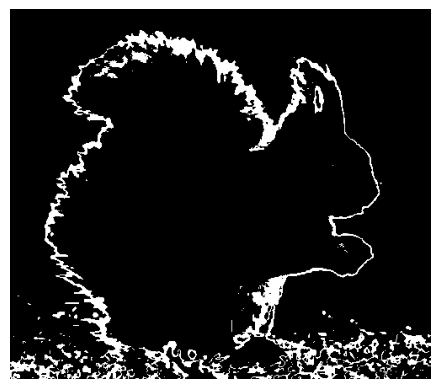

In [46]:
h, s, v = cv2.split(hsv)

mask = (h > 20) & (h < 40)

plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.show()

## Basic Image Transformations

Basic image transformations are simple operations that change how an image looks without changing the content, such as resizing, rotating or flipping, and they are commonly used both for preprocessing and for image augmentation to create more training examples.

#### Examples:

**Resizing**

(100, 200, 3)


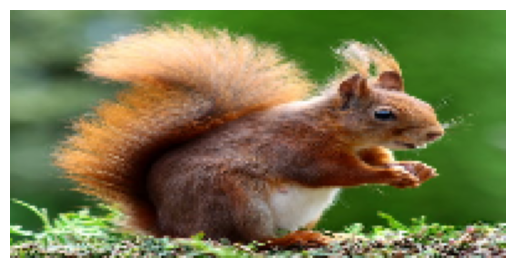

In [4]:
resized = cv2.resize(img, (200, 100))
print(resized.shape)  # (100, 200, channels)

plt.imshow(resized)
plt.axis('off')
plt.show()

**Flipping**

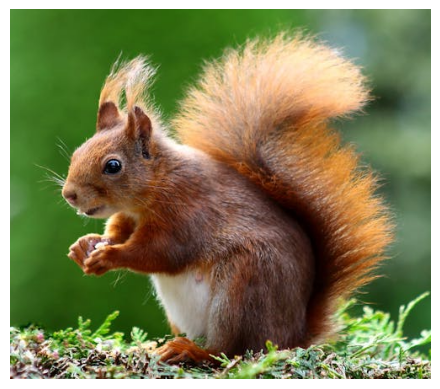

In [10]:
flipped = cv2.flip(img, 1) # 0 = vertical, 1 = horizontal, -1 = both

plt.imshow(flipped)
plt.axis('off')
plt.show()


**Rotation**

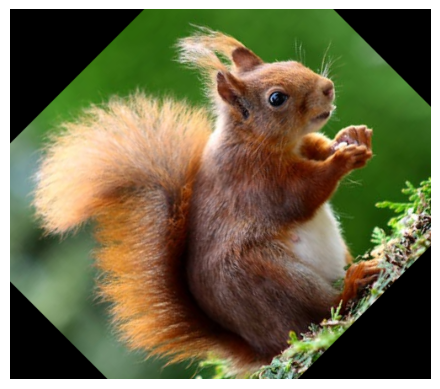

In [18]:
center = (img.shape[1] // 2, img.shape[0] // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.0) # Rotate 45 degrees over center with scale 1.0
rotated = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

plt.imshow(rotated)
plt.axis('off')
plt.show()

**Changing Brightness**

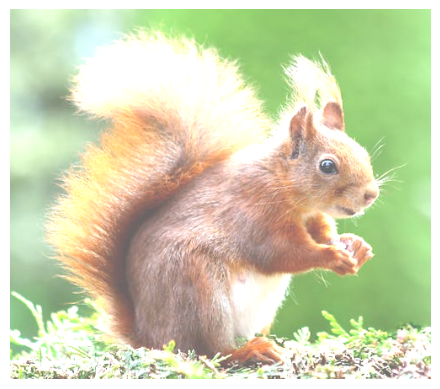

In [54]:
img16 = img.astype(np.int16)
brighter = np.clip(img16 + (100), 0, 255).astype(np.uint8)

plt.imshow(brighter)
plt.axis('off')
plt.show()

## Summary

In this notebook, we learned how images are represented as tensors and how different
representations expose different types of information. By changing color spaces and
applying simple transformations, we can make certain visual properties easier or harder
to detect.

These operations form the foundation of all computer vision pipelines, including
deep learning–based models, which will be explored in later notebooks.